In [26]:
import pandas as pd
import numpy as np
import seaborn as sns 
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [27]:
incidents = pd.read_csv('incidents.csv')
incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Latitude,Longitude,Location,Department_ID
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,5,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",5,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,1,2016-04-25,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,2,2016-01-05,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,5,2016-01-01,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [28]:
visual = incidents

# Part 1: what do you want to learn about?

### 1.1 Identify two pairs of variables that may be related to each other.

A few pairs of variables that may be related to each other are as follows:

a. the category of a crime and the time of day it occurs
<br/> b. the category of a crime and the district it occurs in
<br/> c. the district of an incident and whether or not an arrest led to a booking


### 1.2 How are these variables measured? Discuss their reliability and validity.

### 1.3 For each pair, come up with a theoretical argument about why one might cause the other.

a. Crimes such as assault or theft may occur more frequently at night, when there aren't as many people around
<br/> b. Some crimes may occur, or be logged, more frequently in districts that have more police presence.
<br/> c. The proportion of crime incidents that lead to an arrest and booking may differ depending on the district and the police presence there

# Part 2: Descriptives

### 2.1 Identify a categorical, ordinal, and numeric variable in the data set. (You may use the variables identified in part 1.1 or others).

a. A categorical variable would be the category of crime 
<br/> b. An ordinal variable would be the days of the week the crime occured
<br/> c. A numeric variable would be latitude and longitudes of each incident

### 2.2 Write code to come up with descriptive statistics for these three variables. What are typical values? What does the distribution look like?

a. For the Categories of crimes, the distribution of counts looks like: 

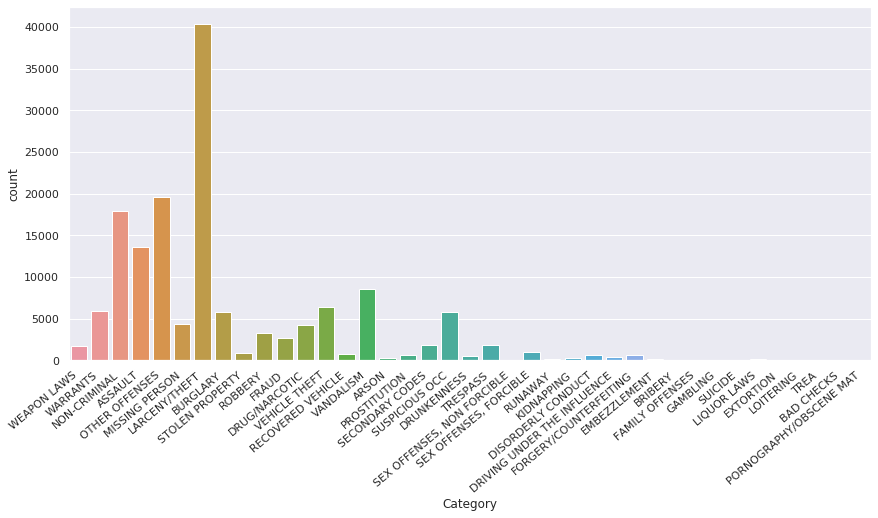

In [44]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='Category', data=visual);
plt.xticks(rotation=40,ha = 'right')
plt.tight_layout()
plt.show()

b. The distribution of crimes per days of the week:

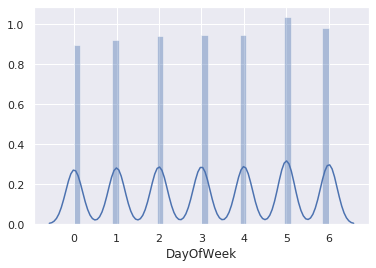

In [30]:
days = sns.distplot(visual['DayOfWeek'])
days;

c. The Numeric variable

### 2.3 Repeat this process for the remaining variables you identifed in part 1.1

a. Crime of Larceny/Theft per time of day:

In [49]:
visual['Time'] = pd.to_datetime(visual['Time'])
times = []
for date in visual['Time']:
    times.append(date.time().strftime('%H:%M:%S'))
visual['Time'] = times

categories = visual.reset_index().groupby('Category').count().sort_values(by='index', ascending = False).head(1).index.tolist()

In [50]:
counting = visual[visual['Category'].isin(categories)]
counting = counting.reset_index().groupby(['Time','Category'], as_index=False).count().rename(columns={'index':'ct'})

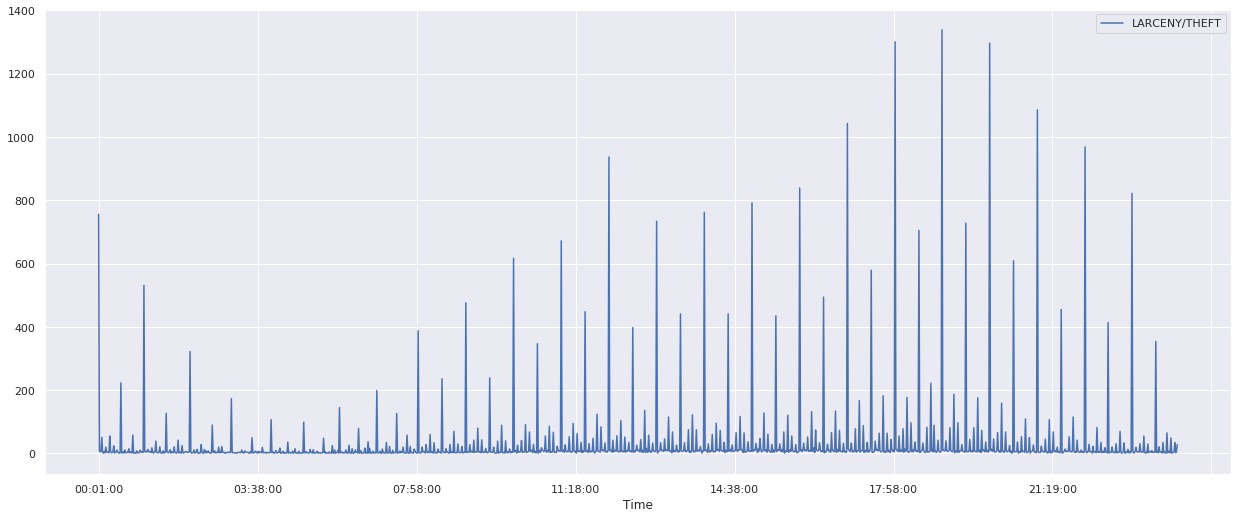

In [51]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
# key gives the group name (i.e. category), data gives the actual values
for key, data in counting.groupby('Category'):
    data.plot(x='Time', y='ct', ax=ax, label=key)

plt.tight_layout()
plt.show()


In [55]:
larceny = visual[visual['Category'].isin(categories)]
larceny.loc[:,'Time'] = pd.to_datetime(larceny.loc[:,'Time'])
larceny.loc[:,'Hour'] = larceny['Time'].dt.hour

category2 = ['ASSAULT']
assault = visual[visual['Category'].isin(category2)]
assault.loc[:,'Time'] =  pd.to_datetime(assault.loc[:,'Time'])
assault.loc[:,'Hour'] = assault['Time'].dt.hour

In [56]:
print(np.mean(assault['Hour']), np.mean(larceny['Hour']))

12.993002872504972 14.4314244704019


In [57]:
stats.ttest_ind(larceny['Hour'], assault['Hour'])

Ttest_indResult(statistic=23.221757335148666, pvalue=1.0513210951980424e-118)

b. Crime by district:

In [37]:
district = visual[visual['Category'].isin(categories)]
district = district.reset_index().groupby(['PdDistrict','Category'], as_index=False).count().rename(columns={'index':'count'})
district

,PdDistrict,Category,count,IncidntNum,Descript,DayOfWeek,Date,Time,Resolution,Address,Latitude,Longitude,Location,Department_ID
0,BAYVIEW,LARCENY/THEFT,2357,2357,2357,2357,2357,2357,2357,2357,2357,2357,2357,2357
1,CENTRAL,LARCENY/THEFT,6740,6740,6740,6740,6740,6740,6740,6740,6740,6740,6740,6740
2,INGLESIDE,LARCENY/THEFT,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781
3,MISSION,LARCENY/THEFT,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321
4,NORTHERN,LARCENY/THEFT,7219,7219,7219,7219,7219,7219,7219,7219,7219,7219,7219,7219
5,PARK,LARCENY/THEFT,2224,2224,2224,2224,2224,2224,2224,2224,2224,2224,2224,2224
6,RICHMOND,LARCENY/THEFT,3133,3133,3133,3133,3133,3133,3133,3133,3133,3133,3133,3133
7,SOUTHERN,LARCENY/THEFT,9203,9203,9203,9203,9203,9203,9203,9203,9203,9203,9203,9203
8,TARAVAL,LARCENY/THEFT,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605
9,TENDERLOIN,LARCENY/THEFT,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825


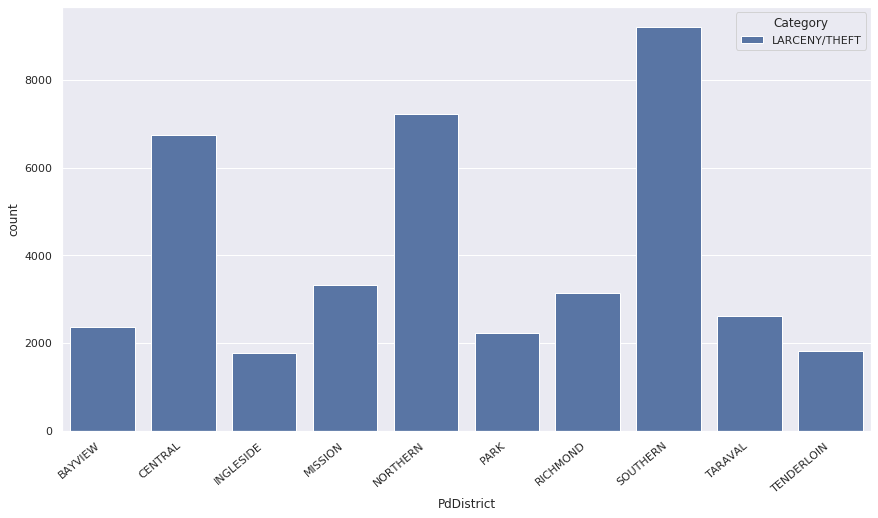

In [42]:
plt.figure(figsize=(15,10))
cx = sns.barplot(x="PdDistrict", y="count", hue="Category", data=district)
plt.xticks(rotation=40, ha='right')

plt.tight_layout()
plt.show()


c. Proportion of crimes that lead to arrest and booking by district:

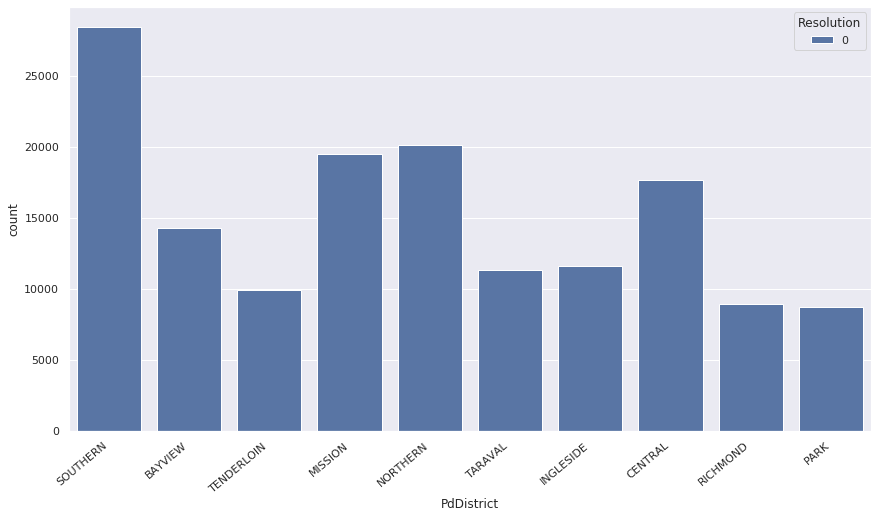

In [41]:
arrests = []
for arrest in visual['Resolution']:
    if arrest == 'ARREST, BOOKED':
        arrests.append(1)
    else:
        arrests.append(0)
        
visual['Resolution'] = arrests

plt.figure(figsize=(15,10))

bx = sns.countplot(x='PdDistrict',hue ='Resolution', data=visual);

plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

## Part 3: Relationships

3.1 For each pair of variables from 1.1, come up with an appropriate way to measure the strength of the relationship between the variables. If possible, come up with a visual way to represent this.

3.2 For each pair, conduct a hypothesis test where the null hypothesis is that there is no relationship between the two variables. What do you learn from these tests?

In [40]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

In [37]:
# function to turn time into minutes since midnight 

def minutes_midnight(val):
    tt = pd.to_datetime(val).time()
    return tt.hour * 3600 + tt.minute

In [39]:
# turning time into a numeric attribute
incidents['Time'] = incidents.Time.apply(minutes_midnight)

# one-hot-encoding the category of the crime 
incidents = pd.get_dummies(incidents, columns=['Category'], prefix = '', 
                           prefix_sep = '', drop_first = True)

In [79]:
incidents.head(2)

,IncidntNum,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Latitude,Longitude,...,"SEX OFFENSES, NON FORCIBLE",STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,120058272,POSS OF PROHIBITED WEAPON,5,2016-01-29,39600,SOUTHERN,1,800 Block of BRYANT ST,-122.403405,37.775421,...,0,0,0,0,0,0,0,0,0,1
1,120058272,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",5,2016-01-29,39600,SOUTHERN,1,800 Block of BRYANT ST,-122.403405,37.775421,...,0,0,0,0,0,0,0,0,0,1


In [45]:
incidents.columns

Index(['IncidntNum', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'Latitude', 'Longitude', 'Location',
       'Department_ID', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC',
       'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES',
       'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING',
       'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON',
       'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT',
       'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY',
       'SECONDARY CODES', 'SEX OFFENSES, FORCIBLE',
       'SEX OFFENSES, NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'],
      dtype='object')

In [48]:
droppable = ['IncidntNum', 'Resolution', 'Descript', 'Date', 
             'PdDistrict', 'Address', 'Location', 'Department_ID']

# predict resolution from latitude, longitude, time, and type of crime

X = incidents.drop(columns=droppable, axis=1)
y = incidents['Resolution']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
# fitting the model 

model = sm.OLS(y_train, X_train)

results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             Resolution   R-squared (uncentered):                   0.569
Model:                            OLS   Adj. R-squared (uncentered):              0.569
Method:                 Least Squares   F-statistic:                              3248.
Date:                Wed, 04 Nov 2020   Prob (F-statistic):                        0.00
Time:                        15:13:46   Log-Likelihood:                         -33038.
No. Observations:              100834   AIC:                                  6.616e+04
Df Residuals:                  100793   BIC:                                  6.655e+04
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [52]:
droppable = ['IncidntNum', 'DayOfWeek', 'Descript', 'Date', 
             'PdDistrict', 'Address', 'Location', 'Department_ID']

# predict day of the week  from latitude, longitude, time, and type of crime

X = incidents.drop(columns=droppable, axis=1)
y = incidents['DayOfWeek']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
# fitting the model 

model = sm.OLS(y_train, X_train)

results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              DayOfWeek   R-squared (uncentered):                   0.705
Model:                            OLS   Adj. R-squared (uncentered):              0.705
Method:                 Least Squares   F-statistic:                              5869.
Date:                Wed, 04 Nov 2020   Prob (F-statistic):                        0.00
Time:                        15:24:13   Log-Likelihood:                     -2.1262e+05
No. Observations:              100834   AIC:                                  4.253e+05
Df Residuals:                  100793   BIC:                                  4.257e+05
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [58]:
droppable = ['IncidntNum', 'Latitude', 'Longitude', 'Descript', 'Date', 
             'PdDistrict', 'Address', 'Location', 'Department_ID']

# predict day of the week  from latitude, longitude, time, and type of crime

X = incidents.drop(columns=droppable, axis=1)
y = incidents[['Latitude', 'Longitude']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
X_train

,DayOfWeek,Time,Resolution,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,...,"SEX OFFENSES, NON FORCIBLE",STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
115055,0,7245,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
689,3,39643,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107907,4,25226,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
35713,5,54020,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49473,1,54000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94104,3,10850,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
118880,3,72045,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89122,1,43200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123799,4,7200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13094,5,75600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
from statsmodels.multivariate import multivariate_ols 

model = multivariate_ols._MultivariateOLS(y, X)

results = model.fit()


In [91]:
len(X)

150499

In [92]:
len(Y)

150499

In [90]:
results._fittedmod[2].shape

(41, 41)

In [98]:
results._fittedmod[0].shape

(41, 2)

In [78]:
results.summary()

NotImplementedError: 

In [73]:
results.mv_test().summary()

IndexError: index 1 is out of bounds for axis 0 with size 1

## Part 4: Causal inference

4.1 If you found a strong relationship between the variables in part 3, what might be some alternative explanations? If you did not find a strong relationship, could there be confounding variables which mask a true causal relationship? 

4.2 Identify a variable (Z) in the dataset which could be a confounding variable for one of the relationships you studied (ideally corresponding to your answer from 4.1, but it's ok if not). Look at the relationzhip between your main independent and dependent variables and Z. Does this provide evidence that Z is an important confounding variable?

4.3 Run a multivariate regression which includes the variable Z from 4.2 as a control variable. How are the results different than a bivariate regression without Z? 




## Part 5: Next Steps

5.1 Summarize what you learned from parts 1-4.

5.2 If you wanted to learn more about the causal relationships from part 1, what additional data would be useful to collect?

5.3 Think of an alternative research design which would provide better causal evidence for this relationship. Alternatively, could you ask a slightly different question which would allow for a more credible causal analysis?